<a href="https://colab.research.google.com/github/msnaru/PRML/blob/master/scr/Ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# アンサンブル学習とランダムフォレスト
アンサンブル学習は複数の学習器を組み合わせる学習方法である。

個々のそこそこ精度の良い学習器を**弱学習器**といい、これらを組み合わせた**強学習器**によって高い精度を求める。

このアンサンブルメソッドのうち、弱学習器である決定木の予測の平均をとる方法が**ランダムフォレスト**である。

その他アンサンブル法としては
+ バギング
+ ブースティング
+ スタッキング

があげられる。

## 投票分類器

#### ハード投票分類器
分類に用いられる学習器にはロジスティック回帰、SVM、ランダムフォレスト、k近傍、k平均等、多様な学習器がある。

これらを弱学習器として強学習器をつくる時に最も単純であり強力な方法は、各分類機の予測結果の多数決を取る方法である。これを**ハード投票分類器**という。

このような強学習器が効力を発揮するには、弱学習器同士の独立性が重要である。そのため異なるデータで学習したり、異なるアルゴリズムを使う必要がある。

#### ソフト投票分類器
ハード投票では弱学習器がそれぞれが1票の投票権を持つ。

これにたいして、弱学習器の予測結果を各クラスの確率として表現し、これらの平均をとることで強学習器とする方法があり、これを**ソフト投票分類器**という。

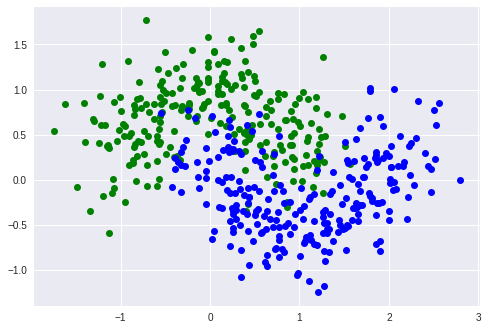

In [50]:
# make_moons データ作成

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

(X_train, X_test, y_train, y_test) = train_test_split(
    X, y, test_size=0.3, random_state=42,
)

class1x = np.array([])
class2x = np.array([])
class1y = np.array([])
class2y = np.array([])
for i in range(len(y)):
    if y[i] == 0:
        class1x = np.append(class1x, X[:,0][i])
        class1y = np.append(class1y, X[:,1][i])
    else:
        class2x = np.append(class2x, X[:,0][i])
        class2y = np.append(class2y, X[:,1][i])

plt.plot(class1x, class1y, 'go')
plt.plot(class2x, class2y, 'bo')
plt.show()

In [53]:
# ハード投票分類器の学習

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting = 'hard'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [54]:
# 精度予測

from sklearn.metrics import accuracy_score

for clf in(log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.86
RandomForestClassifier 0.9
SVC 0.9133333333333333
VotingClassifier 0.92


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
